# The 80's chart

This notebook is dedicated to the evaluation of the 80's chart.

In [1]:
import pandas as pd
import re
import numpy as np
import operator
from similarity.levenshtein import Levenshtein
levenshtein = Levenshtein()

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistic test
import scipy.stats as st

## Original Chart

Unlike the seventies, the eighties have had an original decade chart. It was held in 1989 and it contained 120 songs. I have a text document describing all the songs in the order they appeared in the chart. I have handeled the files regarding this chart in a seperate python file. Now I would like to take a look at it and see what story it can tell me.

In [2]:
eighties_original_df = pd.read_csv("DFs/original_eighties_decade_chart.csv")
        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
location              120 non-null int64
name                  120 non-null object
artist                120 non-null object
spotify_popularity    120 non-null int64
spotify_valence       120 non-null float64
spotify_year          120 non-null int64
wikipedia_year        120 non-null int64
genres                120 non-null object
views                 120 non-null int64
yearly_position       120 non-null int64
dtypes: float64(1), int64(6), object(3)
memory usage: 8.0+ KB
None


Let's have a look at the most popular songs from the original chart:

In [19]:
print(eighties_original_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
location              120 non-null int64
name                  120 non-null object
artist                120 non-null object
spotify_popularity    120 non-null int64
spotify_valence       120 non-null float64
spotify_year          120 non-null int64
wikipedia_year        120 non-null int64
genres                120 non-null object
views                 120 non-null int64
yearly_position       120 non-null int64
year                  120 non-null int64
year_source           120 non-null object
dtypes: float64(1), int64(7), object(4)
memory usage: 9.4+ KB
None


In [60]:
print("Not in the yearly chart - "+str(eighties_original_df.loc[eighties_original_df['yearly_position'] == 0].count()['name']))
print("First in the yearly chart - "+str(eighties_original_df.loc[eighties_original_df['yearly_position'] == 1].count()['name']))

Not in the yearly chart - 61
First in the yearly chart - 6


In [54]:
display(eighties_original_df.sort_values(by=['spotify_popularity'], ascending=False).head())
display(eighties_original_df.sort_values(by=['views'], ascending=False).head())

,location,name,artist,spotify_popularity,spotify_valence,spotify_year,wikipedia_year,genres,views,yearly_position,year,year_source
101,102,Panic,The Smiths,87,0.728,2019,1986,['Alternative rock'],42186,0,1986,wikipedia
1,2,Every Breath You Take,The Police,85,0.740,1983,1983,"['New wave music', 'Soft rock']",239955,9,1983,spotify
62,63,Africa,Toto,85,0.732,1982,1982,"['Soft rock', 'Jazz fusion']",494987,0,1982,spotify
2,3,Woman,John Lennon,83,0.268,2018,1981,['Soft rock'],35533,2,1981,wikipedia
85,86,Thriller,Michael Jackson,82,0.847,1982,1982,"['Post disco', 'Funk']",179830,0,1982,spotify


,location,name,artist,spotify_popularity,spotify_valence,spotify_year,wikipedia_year,genres,views,yearly_position,year,year_source
41,42,We Are the World,USA for Africa,68,0.184,1977,1985,"['Pop music', 'Gospel music']",510427,2,1985,wikipedia
62,63,Africa,Toto,85,0.732,1982,1982,"['Soft rock', 'Jazz fusion']",494987,0,1982,spotify
92,93,Another One Bites the Dust,Queen,76,0.699,1980,1980,"['Funk rock', 'Disco']",324267,12,1980,spotify
34,35,Billie Jean,Michael Jackson,82,0.847,1982,1983,"['Post-disco', 'Rhythm and blues', 'Funk', 'Da...",285007,2,1982,spotify
13,14,Money for Nothing,The Dire Straits,63,0.657,1985,1985,[],258202,15,1985,spotify


Surpringly, we see that the most popular song of the original chart in Spotify is 'Panic' by The Smiths. It had passed both 'Every Breath You Take' by The Police and 'Africa' by Toto, which I thought would be more popular. The most popular song in Wikipedia, though, is 'We Are The World', A charity song written by Michael Jackson to support Africa. Now let's have a look at the popular genres of the chart.

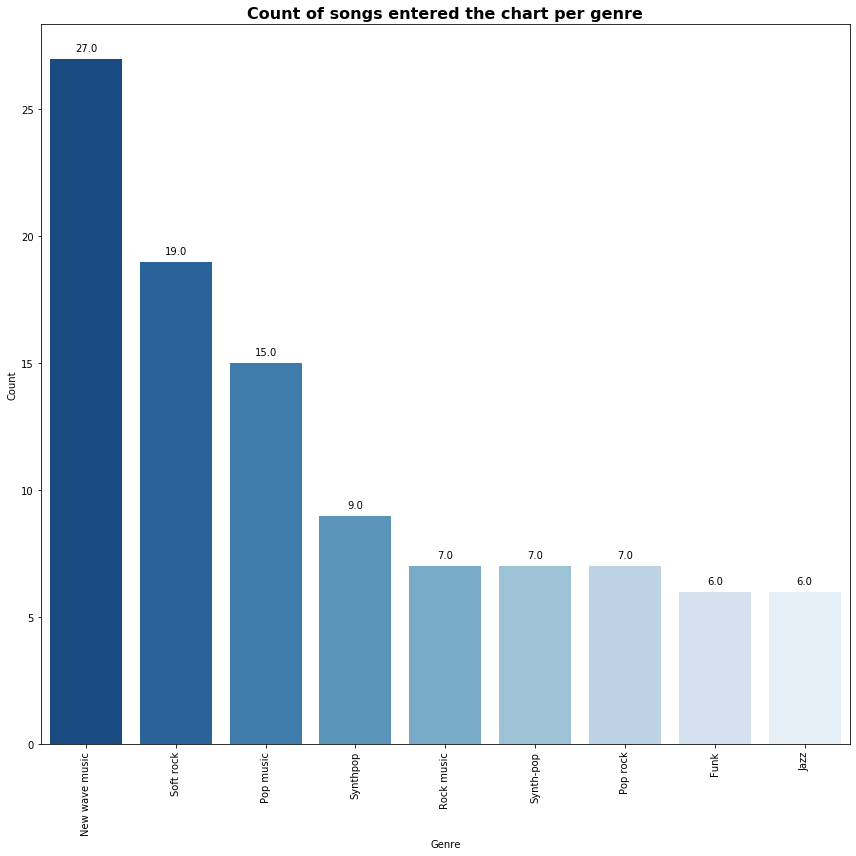

In [11]:
genres_dict = {}
for song_genre in eighties_original_df['genres']:
    for genre in song_genre.split(","):
        if len(re.findall(r"'([^']*)'", genre))>0:
            if re.findall(r"'([^']*)'", genre)[0] in genres_dict.keys():
                genres_dict[re.findall(r"'([^']*)'", genre)[0]] = genres_dict[re.findall(r"'([^']*)'", genre)[0]] + 1
            else:
                genres_dict[re.findall(r"'([^']*)'", genre)[0]] = 1
newDict = dict(filter(lambda elem: elem[1] > 5,genres_dict.items()))
order_key = sorted(newDict.items(), key=operator.itemgetter(1), reverse = True)
keys = []
for key in order_key:
    keys.append(key[0])
plt.figure(figsize=(12,12))
ax = sns.barplot(x=list(newDict.keys()), y=np.array(list(newDict.values())).astype(float), order = keys,
                palette = "Blues_r")
ax.set_title("Count of songs entered the chart per genre", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="Genre", ylabel='Count')
for item in ax.get_xticklabels(): item.set_rotation(90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:,}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

The most popular genre of the chart by far is <b>'New wave music'</b>. It is a genre compassing numerous pop/rock oriented music styles, as it moved away from traditional blue and rock and roll sounds to create pop and rock music the incorporated disco and electronic music. It is engendered subgenres and fusions such as Synthpop. Among the popular artists who have touched the genre from different perspectives we can count Madness, Spandau Ballet, Eurythmics, Duran Duran, Depeche Mode etc.


In [26]:
grouped_by_year = eighties_original_df.groupby('year')
year_df = []
for group in grouped_by_year:
    year = {}
    year['name'] = group[0]
    year['count_songs'] = group[1]['name'].count()
    year['avg_song_pop'] = group[1]['spotify_popularity'].mean()
    year['avg_views'] = group[1]['views'].mean()
    year['avg_chart_location'] = group[1]['location'].mean()
    year['yearly_entrances_percentage'] = group[1].loc[group[1]['yearly_position'] > 0]['yearly_position'].count() / group[1]['name'].count() 
    year['average_yearly_position'] = group[1].loc[group[1]['yearly_position'] > 0]['yearly_position'].mean()
    year['avg_valence'] = group[1]['spotify_valence'].mean()
    genres = {}
    for song in group[1]['genres']:
        for song_genre in song.split(","):
            if len(re.findall(r"'([^']*)'", song_genre))>0:
                if re.findall(r"'([^']*)'", song_genre)[0] not in genres.keys():
                    genres[re.findall(r"'([^']*)'", song_genre)[0]] = 1
                else:
                    genres[re.findall(r"'([^']*)'", song_genre)[0]] += 1
    year['popular_genre'] = max(genres.items(), key=operator.itemgetter(1))[0]
    year_df.append(year)
year_df= pd.DataFrame(year_df)
display(year_df)

,name,count_songs,avg_song_pop,avg_views,avg_chart_location,yearly_entrances_percentage,average_yearly_position,avg_valence,popular_genre
0,1980,14,62.785714,63575.642857,49.857143,0.428571,10.333333,0.533500,New wave music
1,1981,10,70.200000,85220.900000,45.600000,0.700000,9.285714,0.560300,Soft rock
2,1982,17,65.000000,115345.000000,72.411765,0.411765,7.428571,0.602265,New wave music
3,1983,16,65.687500,80075.437500,64.062500,0.437500,11.428571,0.609626,New wave music
4,1984,19,68.894737,86344.000000,52.210526,0.631579,11.333333,0.512068,Pop music
5,1985,18,65.888889,107206.611111,60.666667,0.500000,11.444444,0.483561,Pop music
6,1986,10,60.300000,58476.500000,79.600000,0.300000,5.666667,0.551500,New wave music
7,1987,6,71.500000,53019.166667,36.500000,0.500000,7.666667,0.425500,Rock music
8,1988,7,65.142857,39901.285714,77.857143,0.428571,6.000000,0.706571,Folk rock
9,1989,3,70.000000,109719.000000,68.666667,0.666667,1.500000,0.541333,Lambada


Let's have a look at the yearly breakdown reveals a drop in the number of songs entered the chart in the last three years. One possible explanation could be that these songs were less popular, though I'd prefer to think that the voting patterns of these chart are dependant in nostalgy feelings. In 1989, people were able to look back on the songs from the early years in an appreciative manner. 

The most popular year in Wikipedia is 1982, with no less than 17 songs entering the chart with an average of more than 115k views per song in the first ten months of 2019. The yearly entrances percentage suggests a slim connection to the decade chart. Even looking at 1989 shows the one song have made it into the decade chart without entering the yearly chart. 

## Renewed Chart
Now I'm going to look at the new chart conducted in 2019.

In [2]:
eighties_df = pd.read_csv("DFs/united_eighties.csv")

In [28]:
print(eighties_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 23 columns):
name                   498 non-null object
version_exists         498 non-null int64
artist                 498 non-null object
artist_first_letter    498 non-null object
year                   498 non-null int64
year_source            498 non-null object
song_popularity        498 non-null int64
artist_popularity      498 non-null int64
duration_ms            498 non-null int64
key                    498 non-null int64
time_signature         498 non-null int64
acousticness           498 non-null float64
danceability           498 non-null float64
energy                 498 non-null float64
instrumentalness       498 non-null float64
loudness               498 non-null float64
speechiness            498 non-null float64
valence                498 non-null float64
tempo                  498 non-null float64
genres                 498 non-null object
views                  498 non-nul

Let's have a brief review on some of the interesting features in this table:
1. <b>Version Exists</b> - Indicates whether the name of the song in spotify contained a reference to a specific version. My premise is that if such reference exists, it could indicate that the song is popular such as numerous versions have been created to it.
2. <b>Artist First Letter</b> - Created in order to identify whether the design of the voting website influenced any voting patterns.
3. <b>Year Source</b> - Because I indicated problems with the year tags from Spotify, I also scraped the tagging out of Wikipedia. Then, I checked which of these sources points at a year which is within the range of our decade. If no such tagging exists, I tagged the song manually. This field, therefore, recieves one of three possible values: "Spotify", "Wikipedia" or "Manual".
4. <b>Spotify Features</b> - All of the following features have been taken out of spotify using Spotify API, and they are well documented in it's website: song_popularity, artist_popularity, duration_ms, key, time_signature, acousticness, danceability, energy, instrumentalness, loudness, speechiness, valence, tempo.
5. <b>Genres</b> - Tagging of genres scraped from the Wikipedia entries of the songs. 
6. <b>Views</b> - A summary of the views of the song's Wikipedia page in 2019. If no such page exists, than this field would be 0.
7. <b>Old Chart Position</b> - The position of the song (if entered) in the original end-of-year charts in Israel.
8. <b>New Chart Location</b> - The position of the song in the renewed decade chart conducted by Glglz in Aug 19. If the song is not in the top 100, then it will show as 0.

Now let's go over these features and see how they distribute.

## Original Position

In [48]:
original_positions = []
for row in eighties_df.iterrows():
    found_song = 0
    for orig_row in eighties_original_df.iterrows():
        if levenshtein.distance(orig_row[1]['name'], row[1]['name'].split("_")[1]) <= 1 and found_song == 0:
            print(orig_row[1]['name'], row[1]['name'].split("_")[1])
            original_positions.append(orig_row[1]['location'])
            found_song = 1
    if found_song == 0:
        print(row[1]['name'].split("_")[1] +" - NO MATCH!")
        original_positions.append(0)
print(len(original_positions))        
eighties_df['original_position'] = original_positions

Take on Me - NO MATCH!
Hallelujah - NO MATCH!
Sweet Child O' Mine - NO MATCH!
Livin' On A Prayer - NO MATCH!
Billie Jean Billie Jean
Forever Young Forever Young
Big in Japan Big in Japan
The Winner Takes It All The Winner Takes It All
I Want To Break Free - NO MATCH!
Africa Africa
Another Brick in the Wall, Pt. 2 - NO MATCH!
The Final Countdown - NO MATCH!
Sweet Dreams (Are Made of This)? Sweet Dreams (Are Made of This)
Every Breath You Take Every Breath You Take
Careless Whisper Careless Whisper
Heaven Heaven
Total Eclipse of the Heart - NO MATCH!
Radio Ga Ga - NO MATCH!
Poison - NO MATCH!
Another One Bites the Dust Another One Bites The Dust
Like a Prayer Like a Prayer
You Give Love A Bad Name - NO MATCH!
Thriller Thriller
All Out of Love - NO MATCH!
I'm Still Standing - NO MATCH!
Under Pressure - NO MATCH!
Purple Rain Purple Rain
Girls Just Want to Have Fun - NO MATCH!
Eye of the Tiger Eye of the Tiger
(I've Had) The Time of My Life - NO MATCH!
Eye In The Sky - NO MATCH!
With or Wit

Saving All My Love for You - NO MATCH!
Greatest Love of All - NO MATCH!
This Is Not America - NO MATCH!
Up Where We Belong - NO MATCH!
Here Comes Your Man - NO MATCH!
Sexual Healing - NO MATCH!
Watching The Wheels - NO MATCH!
Blue Monday '88 - NO MATCH!
Celebration - NO MATCH!
I Knew You Were Waiting (For Me) - NO MATCH!
Every Little Thing She Does Is Magic - NO MATCH!
Stop Stop
Need You Tonight - NO MATCH!
Mother - NO MATCH!
I Won't Let The Sun Go Down On Me - NO MATCH!
Games Without Frontiers Games Without Frontiers
Pump Up The Jam - NO MATCH!
Start Me Up - NO MATCH!
Never Tear Us Apart - NO MATCH!
Goodbye Blue Sky - NO MATCH!
Funkytown - NO MATCH!
The Best - NO MATCH!
Panic Panic
Jump - NO MATCH!
Rent - NO MATCH!
Red Red Wine Red Red Wine
Major Tom - NO MATCH!
Don't Give Up Don't Give Up
Dirty Diana - NO MATCH!
Rock You Like a Hurricane - NO MATCH!
Dude (Looks Like A Lady) - NO MATCH!
Express Yourself - NO MATCH!
Lessons In Love - NO MATCH!
Ghostbusters - NO MATCH!
Just an Illusion 

In [50]:
op_df = eighties_df.loc[eighties_df['original_position'] == 0].loc[eighties_df['new_chart_location'] < 101]
print(op_df['name'].count())

62


## Version Exists

In [10]:
version_exists = eighties_df.groupby('version_exists')
exists_df = []
for group in version_exists:
    category = {}
    category['name'] = group[0]
    category['count_songs'] = group[1]['name'].count()
    category['avg_popularity'] = group[1]['song_popularity'].mean()
    category['avg_artist_popularty'] = group[1]['artist_popularity'].mean()
    category['count_wikipedia'] = group[1].loc[group[1]['views'] > 0]['views'].count()
    category['wikipedia_percentage'] = group[1].loc[group[1]['views'] > 0]['views'].count() /  group[1]['name'].count()
    category['avg_views'] = group[1].loc[group[1]['views'] > 0]['views'].mean()
    category['count_old_chart'] = group[1].loc[group[1]['old_chart_position'] > 0]['old_chart_position'].count()
    category['old_chart_percentage'] = group[1].loc[group[1]['old_chart_position'] > 0]['old_chart_position'].count() / group[1]['name'].count()
    category['avg_new_chart'] = group[1]['new_chart_location'].mean()
    category['count_new_chart'] = group[1].loc[group[1]['new_chart_location'] < 101]['new_chart_location'].count()
    category['new_chart_percentage'] = group[1].loc[group[1]['new_chart_location'] < 101]['new_chart_location'].count() / group[1]['name'].count()
    exists_df.append(category)
exists_df = pd.DataFrame(exists_df)
display(exists_df)

,name,count_songs,avg_popularity,avg_artist_popularty,count_wikipedia,wikipedia_percentage,avg_views,count_old_chart,old_chart_percentage,avg_new_chart,count_new_chart,new_chart_percentage
0,0,397,59.992443,68.629723,383,0.964736,64619.469974,78,0.196474,248.675063,80,0.201511
1,1,101,61.950495,72.138614,101,1.000000,76316.940594,18,0.178218,252.742574,20,0.198020


While we see that overall the songs with a reference to a version are more popular in both Spotify measures and Wikipedia measures, There is no preference at all to those songs comapring to the others. The distribution of the songs that entered the chart is similar to the general population.

## Artist

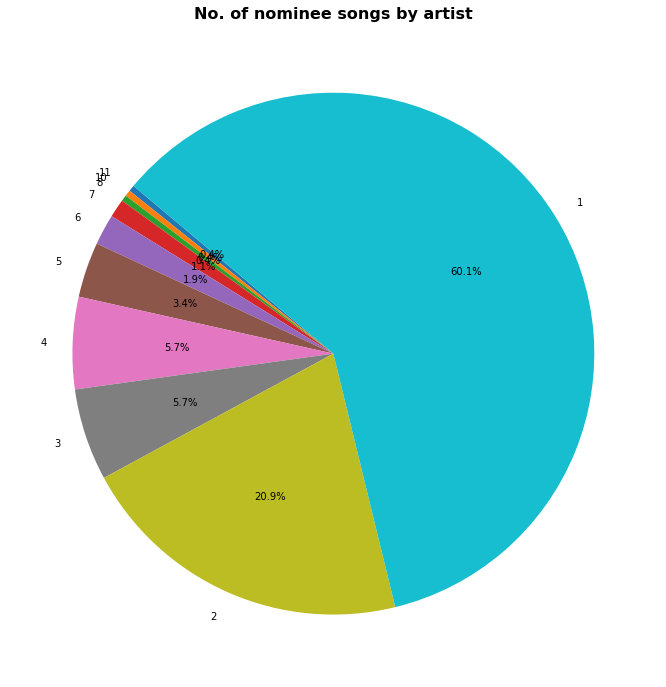

In [11]:
artist_value_counts = eighties_df.artist.value_counts()
artist_count = pd.DataFrame(columns = ['key', 'count'], dtype=int)
for orig_value in artist_value_counts:
    if orig_value in pd.Series(artist_count['count'].astype('int')):
        artist_count.loc[artist_count['key'] == orig_value, 'count'] = artist_count.at[orig_value, 'count']+1
    else:
        artist_count.loc[orig_value] = [orig_value, 1]
plt.figure(figsize=(12,12))
plt.pie(artist_count['count'], labels=artist_count['key'],
autopct='%1.1f%%', startangle=140)
plt.title("No. of nominee songs by artist", {'fontsize': 16,
 'fontweight' : 'bold',
 'verticalalignment': 'bottom', 'horizontalalignment': 'center'})
plt.show()

In [6]:
popular_artists_df = []
for index in eighties_df.artist.value_counts()[eighties_df.artist.value_counts() > 9].index:
    artist = {}
    artist['name'] = index
    artist['nominee_songs'] = eighties_df.artist.value_counts()[index]
    artist['entered_songs'] = eighties_df.loc[eighties_df['new_chart_location'] < 101].artist.value_counts()[index]
    artist['success_rate'] = artist['entered_songs'] / artist['nominee_songs']
    popular_artists_df.append(artist)
popular_artists_df = pd.DataFrame(popular_artists_df)
display(popular_artists_df)

,name,nominee_songs,entered_songs,success_rate
0,Michael Jackson,11,5,0.454545
1,Madonna,10,4,0.400000


There is not such dominance as it used to be in the 70's chart. There are far more artists with 2-5 songs. Only two artists have managed to get 10 songs or more to the nomination list: Michael Jackson and Madonna. Both of them have a similar success rate of 40-50 percent.
Let's compare those results to the original decade chart.

In [32]:
original_artists = eighties_original_df.groupby('artist')
original_artists_df = []
for group in original_artists:
    artist = {}
    artist['name'] = group[0]
    artist['count_songs'] = group[1]['name'].count()
    artist['avg_position'] = group[1]['location'].mean()
    artist['avg_popularity'] = group[1]['spotify_popularity'].mean()
    artist['sum_views'] = group[1]['views'].sum()
    original_artists_df.append(artist)
original_artists_df = pd.DataFrame(original_artists_df)

In [33]:
grouped_by_artist = eighties_df.groupby('artist')
artists_df = []
for index in eighties_df.artist.value_counts().index:
    artist = {}
    artist['name'] = index
    artist['candidate_songs'] = eighties_df.artist.value_counts()[index]
    artist_group = grouped_by_artist.get_group(index)
    artist['first_letter'] = artist_group['artist_first_letter'].values[0]
    artist['popularity'] = artist_group['artist_popularity'].values[0]
    artist['avg_song_pop'] = artist_group['song_popularity'].mean()
    artist['max_song_pop'] = artist_group['song_popularity'].max()
    artist['min_song_pop'] = artist_group['song_popularity'].min()
    artist['genres'] = {}
    for song in artist_group['genres']:
        for song_genre in song.split(","):
            if len(re.findall(r"'([^']*)'", song_genre))>0:
                if re.findall(r"'([^']*)'", song_genre)[0] not in artist['genres'].keys():
                    artist['genres'][re.findall(r"'([^']*)'", song_genre)[0]] = 1
                else:
                    artist['genres'][re.findall(r"'([^']*)'", song_genre)[0]] += 1
    artist['sum_views'] = artist_group['views'].sum()
    artist['avg_views'] = artist_group['views'].mean()
    artist['avg_old_chart'] = artist_group.where(artist_group.old_chart_position > 0).old_chart_position.mean()
    artist['count_old_chart'] = artist_group.where(artist_group.old_chart_position > 0).old_chart_position.count()
    artist['avg_new_chart'] = artist_group.new_chart_location.mean()
    artist['count_new_chart'] = artist_group.where(artist_group.new_chart_location <= 100).name.count()
    artists_df.append(artist)
artists_df = pd.DataFrame(artists_df)
print(artists_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 14 columns):
name               263 non-null object
candidate_songs    263 non-null int64
first_letter       263 non-null object
popularity         263 non-null int64
avg_song_pop       263 non-null float64
max_song_pop       263 non-null int64
min_song_pop       263 non-null int64
genres             263 non-null object
sum_views          263 non-null int64
avg_views          263 non-null float64
avg_old_chart      72 non-null float64
count_old_chart    263 non-null int64
avg_new_chart      263 non-null float64
count_new_chart    263 non-null int64
dtypes: float64(4), int64(7), object(3)
memory usage: 25.7+ KB
None


In [34]:
old_chart_artist = []
old_chart_songs = []
new_chart_artist = []
new_chart_songs = []
sorted_artists = artists_df.sort_values(by=['count_new_chart'], ascending=False).head()
sorted_original_artists = original_artists_df.sort_values(by=['count_songs'], ascending=False).head()
for row in sorted_original_artists.iterrows():
    old_chart_artist.append(row[1]['name'])
    old_chart_songs.append(row[1]['count_songs'])
for row in sorted_artists.iterrows():
    new_chart_artist.append(row[1]['name'])
    new_chart_songs.append(row[1]['count_new_chart'])
top_artists = pd.DataFrame(list(zip(old_chart_artist, old_chart_songs, new_chart_artist, new_chart_songs)),
                                columns=['old_chart_artist', 'songs_in_old_chart', 'new_chart_artist',
                                        'songs_in_new_chart'])
display(top_artists)

,old_chart_artist,songs_in_old_chart,new_chart_artist,songs_in_new_chart
0,U2,6,Queen,6
1,Peter Gabriel,5,Michael Jackson,5
2,The Dire Straits,5,Madonna,4
3,Prince,4,David Bowie,3
4,Sting,4,Cyndi Lauper,3


There's litearally no connection between the popular artists of the renewed chart, comparing to those of the original chart.

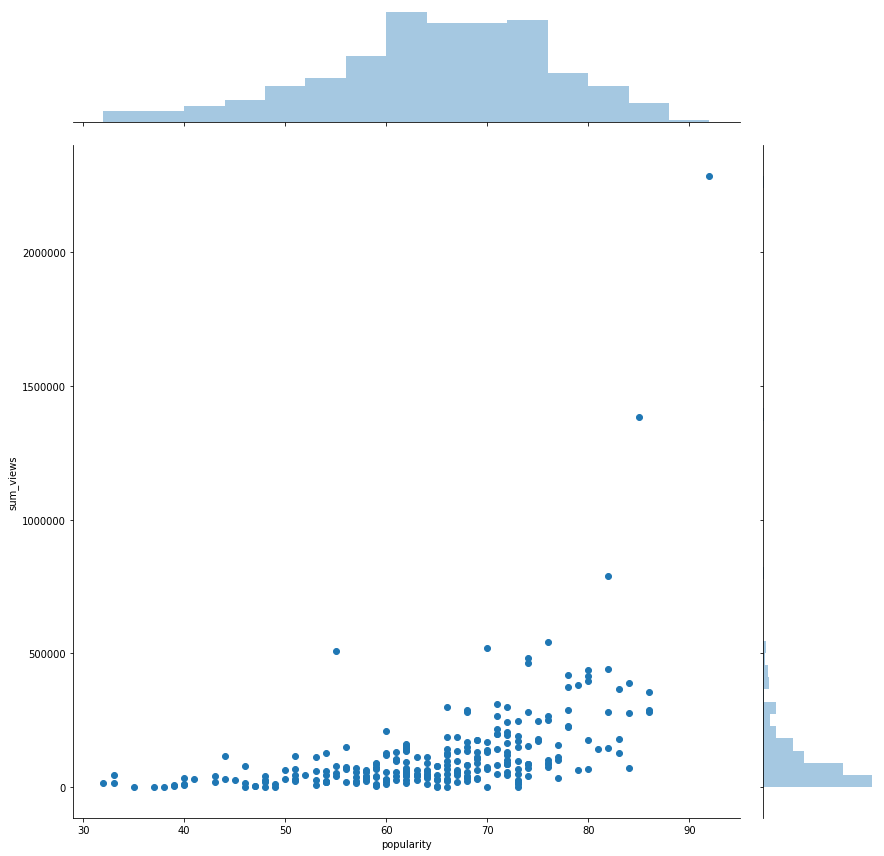

In [35]:
sns.jointplot(x="popularity", y="sum_views", data=artists_df, height=12)

In [36]:
display(artists_df.sort_values(by=['sum_views'], ascending = False).head())

,name,candidate_songs,first_letter,popularity,avg_song_pop,max_song_pop,min_song_pop,genres,sum_views,avg_views,avg_old_chart,count_old_chart,avg_new_chart,count_new_chart
3,Queen,7,Q,92,72.714286,81,66,"{'Rock music': 3, 'Synthpop': 2, 'Pop rock': 1...",2284478,326354.000000,23.000000,1,44.142857,6
0,Michael Jackson,11,M,85,63.818182,80,51,"{'Post-disco': 3, 'R&B': 2, 'Funk': 5, 'Dance-...",1383072,125733.818182,7.000000,2,169.454545,5
1,Madonna,10,M,82,61.800000,73,54,"{'Pop rock': 1, 'Dance-pop': 8, 'Latin pop': 1...",790105,79010.500000,6.571429,7,210.600000,4
4,Prince,7,P,76,66.000000,74,52,"{'Rock music': 1, 'Gospel music': 1, 'Soul blu...",542231,77461.571429,24.000000,1,312.000000,1
25,Leonard Cohen,4,L,70,54.750000,62,48,"{'Folk rock': 2, 'Pop music': 1, 'Jazz': 1}",520378,130094.500000,NaN,0,148.750000,1


In [22]:
display(artists_df.sort_values(by=['avg_views'], ascending = False).head())

,name,candidate_songs,first_letter,popularity,avg_song_pop,max_song_pop,min_song_pop,genres,sum_views,avg_views,avg_old_chart,count_old_chart,avg_new_chart,count_new_chart
175,U.S.A. For Africa,1,U,55,66.000000,66,66,"{'Pop music': 1, 'Gospel music': 1}",510427,510427.0,NaN,0,104.000000,0
147,Toto,1,T,78,83.000000,83,83,"{'Soft rock': 1, 'Jazz fusion': 1}",420669,420669.0,NaN,0,10.000000,1
3,Queen,7,Q,92,72.714286,81,66,"{'Rock music': 3, 'Synthpop': 2, 'Pop rock': 1...",2284478,326354.0,23.0,1,44.142857,6
241,Nena,1,N,66,38.000000,38,38,{},300436,300436.0,NaN,0,306.000000,0
225,Journey,1,J,78,74.000000,74,74,{'Rock music': 1},288821,288821.0,NaN,0,77.000000,1


In the chart we can see that the top three artists have got a distinctively large amount of Wikipedia views. Those top three artists correlates with the results we've seen before: Queen, with an astonishing success rate is at the first place with over 2M views. The second and third place are populated by Michael Jackson and Madonna, who inserted the largest amount of songs to the nomination list.

Therefore, I have found it interesting to watch the top 5 by average views. All of them are taken by artists with only one songs. The first place is occupied by "We Are The World" - a charity single performed by a supergroup of american artists as support for Africa. The second place is "Africa" by Toto, which is one of the most popular eighties song nowadays. The third place is once again the enormous statistic anomality called "Queen" - the only ones this far with more than one song.

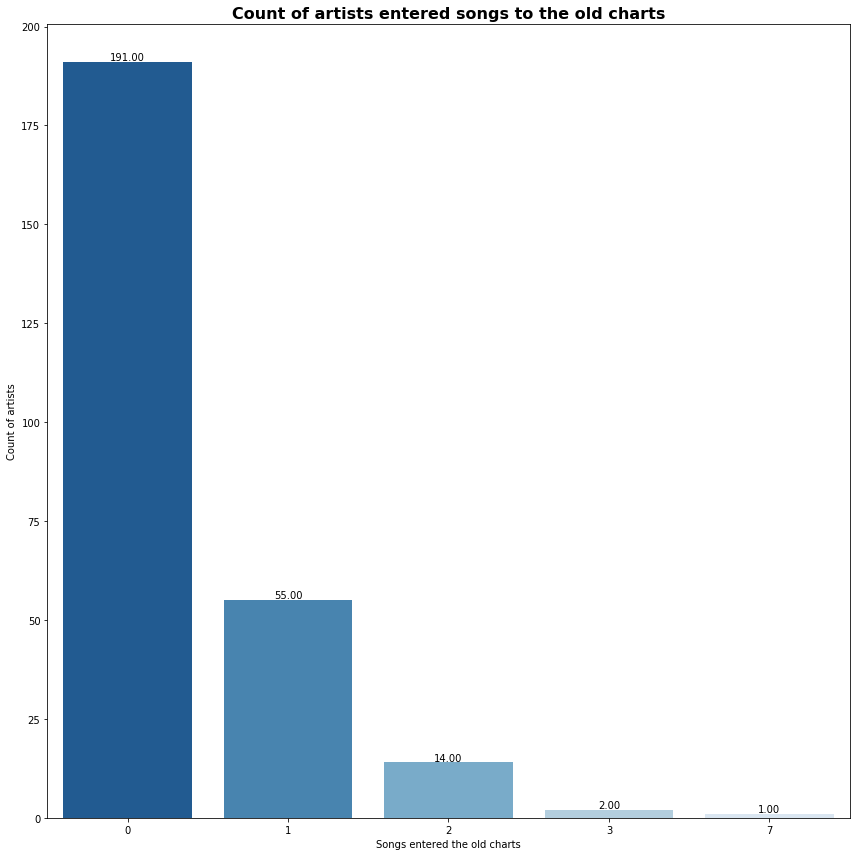

In [30]:
plt.figure(figsize=(12,12))
#sns.countplot()
ax = sns.countplot(x="count_old_chart", data=artists_df, palette ="Blues_r")
ax.set_title("Count of artists entered songs to the old charts", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel='Songs entered the old charts', ylabel='Count of artists')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.4,
            '{:1.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

In [31]:
display(artists_df.loc[artists_df['count_old_chart'] == 7])

,name,candidate_songs,first_letter,popularity,avg_song_pop,max_song_pop,min_song_pop,genres,sum_views,avg_views,avg_old_chart,count_old_chart,avg_new_chart,count_new_chart
1,Madonna,10,M,82,61.8,73,54,"{'Pop rock': 1, 'Dance-pop': 8, 'Latin pop': 1...",790105,79010.5,6.571429,7,210.6,4


Only Madonna have inserted more than three songs to the 80's yearly charts. She was perhaps the most dominant artist of the decade. While she still remains popular, she had experiences some descent in her status.

In [32]:
display(artists_df.sort_values(by=['count_new_chart'], ascending = False).head())

,name,candidate_songs,first_letter,popularity,avg_song_pop,max_song_pop,min_song_pop,genres,sum_views,avg_views,avg_old_chart,count_old_chart,avg_new_chart,count_new_chart
3,Queen,7,Q,92,72.714286,81,66,"{'Rock music': 3, 'Synthpop': 2, 'Pop rock': 1...",2284478,326354.000000,23.000000,1,44.142857,6
0,Michael Jackson,11,M,85,63.818182,80,51,"{'Post-disco': 3, 'R&B': 2, 'Funk': 5, 'Dance-...",1383072,125733.818182,7.000000,2,169.454545,5
1,Madonna,10,M,82,61.800000,73,54,"{'Pop rock': 1, 'Dance-pop': 8, 'Latin pop': 1...",790105,79010.500000,6.571429,7,210.600000,4
9,David Bowie,6,D,82,57.333333,66,43,"{'Rock music': 1, 'New wave music': 2, 'Soul m...",280464,46744.000000,4.500000,2,137.000000,3
26,Guns N' Roses,4,G,84,74.500000,80,66,"{'Hard rock': 3, 'Power ballad': 1, 'Glam meta...",388019,97004.750000,NaN,0,59.500000,3


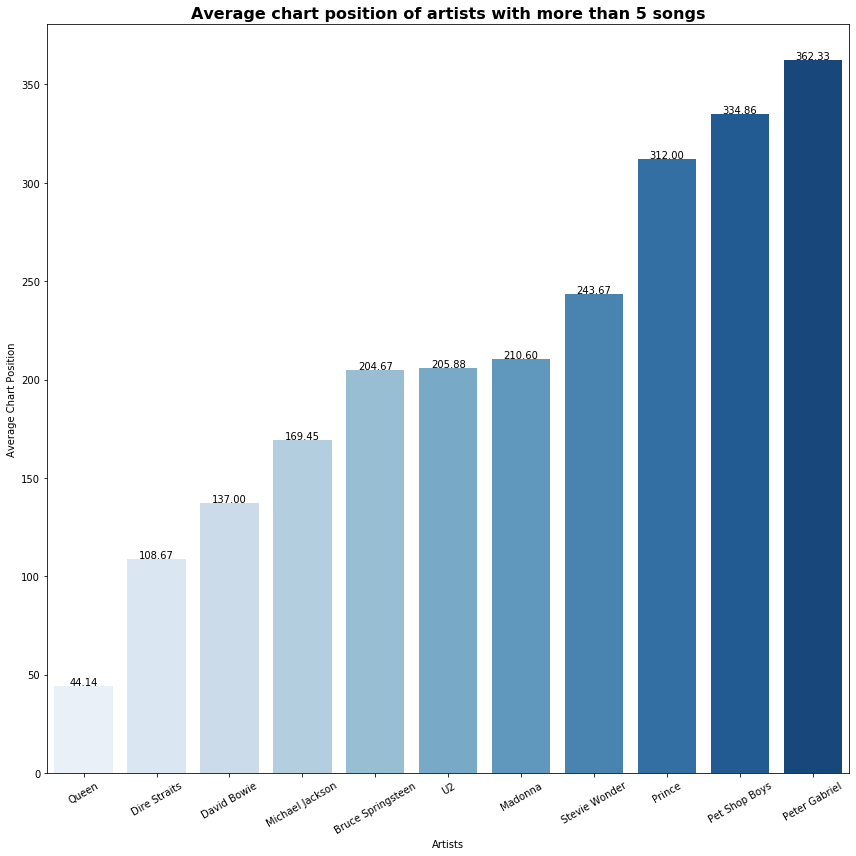

In [41]:
#plt.figure(figsize=(12,12))
#ax = sns.barplot(x=artists_df.loc[artists_df['candidate_songs'] > 5].name, y=artists_df.loc[artists_df['candidate_songs'] > 5].avg_new_chart)
#ax.set(xlabel="Artists Name", ylabel='Average new Chart Locations')
#ax.set_xticklabels(artists_df.loc[artists_df['candidate_songs'] > 5].name, rotation=45, fontsize=10)
#for i, v in enumerate(artists_df.loc[artists_df['candidate_songs'] > 5].avg_new_chart):
#    ax.text(i ,v, "{:,.2f}".format(v), va ='bottom', rotation=45)
#plt.tight_layout()
#plt.show()

plt.figure(figsize=(12,12))
keys_df = artists_df.loc[artists_df['candidate_songs'] > 5].sort_values('avg_new_chart')
ax = sns.barplot(x=artists_df.loc[artists_df['candidate_songs'] > 5].name, y=artists_df.loc[artists_df['candidate_songs'] > 5].avg_new_chart, 
                 palette = "Blues", order = keys_df.name)
ax.set(xlabel="Artists", ylabel="Average Chart Position")
ax.set_title("Average chart position of artists with more than 5 songs", {'fontsize': 16,'fontweight' : 'bold'})
for item in ax.get_xticklabels(): item.set_rotation(30)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.4,
            '{:1.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

The graph above is showing the undisputed recent popularity of Queen. This is another popularity scale which they dominate. They have seven candidate songs in the current chart, and their average position is just over 44, which is more than twice as good as the second plave - Dire Straits - with three nominated songs.

## First Letter

In [57]:
first_letters = artists_df.groupby('first_letter')
fl_df = []
for group in first_letters:
    first_letter = {}
    first_letter['name'] = group[0]
    first_letter['count_artists'] = group[1]['name'].count()
    first_letter['sum_candidate_songs'] = group[1]['candidate_songs'].sum()
    first_letter['sum_popularity'] = group[1]['popularity'].sum()
    first_letter['avg_popularity'] = group[1]['popularity'].mean()
    first_letter['sum_views'] = group[1]['sum_views'].sum()
    first_letter['avg_views'] = group[1]['avg_views'].mean()
    first_letter['count_old_chart'] = group[1]['count_old_chart'].sum()
    first_letter['avg_new_chart'] = group[1]['avg_new_chart'].mean()
    first_letter['count_new_chart'] = group[1]['count_new_chart'].sum()
    first_letter['entrance_percentage'] = first_letter['count_new_chart'] / first_letter['sum_candidate_songs']
    fl_df.append(first_letter)
fl_df = pd.DataFrame(fl_df)
print(fl_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
name                   25 non-null object
count_artists          25 non-null int64
sum_candidate_songs    25 non-null int64
sum_popularity         25 non-null int64
avg_popularity         25 non-null float64
sum_views              25 non-null int64
avg_views              25 non-null float64
count_old_chart        25 non-null int64
avg_new_chart          25 non-null float64
count_new_chart        25 non-null int64
entrance_percentage    25 non-null float64
dtypes: float64(4), int64(6), object(1)
memory usage: 2.1+ KB
None


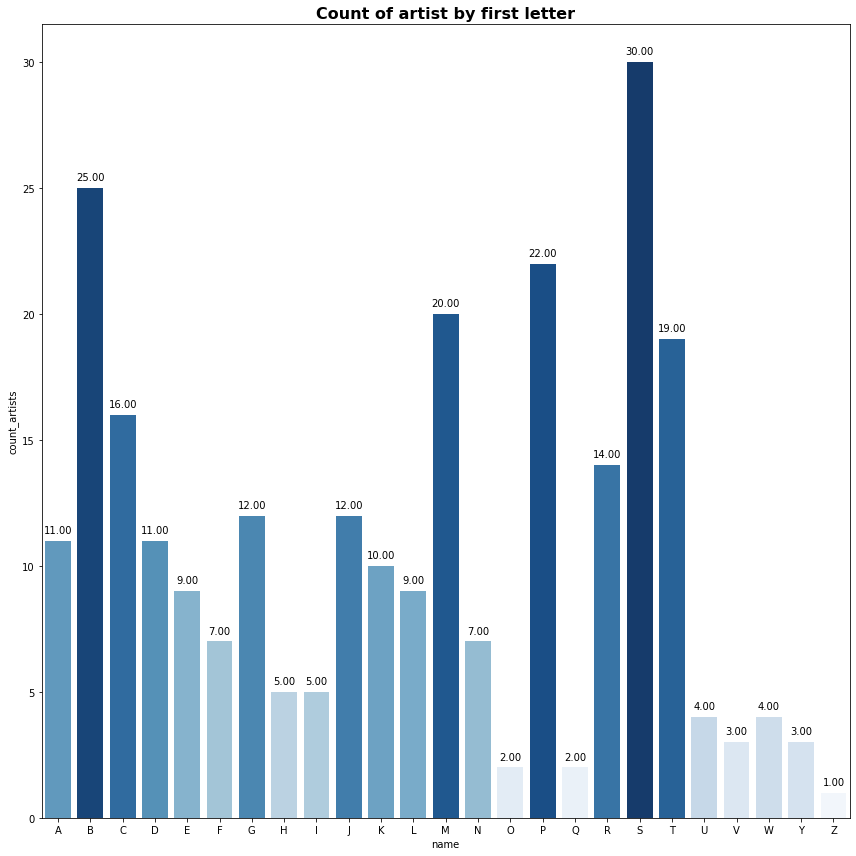

In [58]:
plt.figure(figsize=(12,12))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.count_artists.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.count_artists, order = fl_df.name, palette = np.array(pal[::-1])[rank])
ax.set_title("Count of artist by first letter", {'fontsize': 16,'fontweight' : 'bold'})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

After seeing that the design of the voting website had been significantly influencial on the voting patters, I am taclking the same theory on the 80's chart. First of all, looking at the count of artists by first letters, we see a significant amount of them coming from 'A', 'B', or 'C', though the most significant amount is of artists that starts with 'S'. Let's have a look on the count of nominee songs.

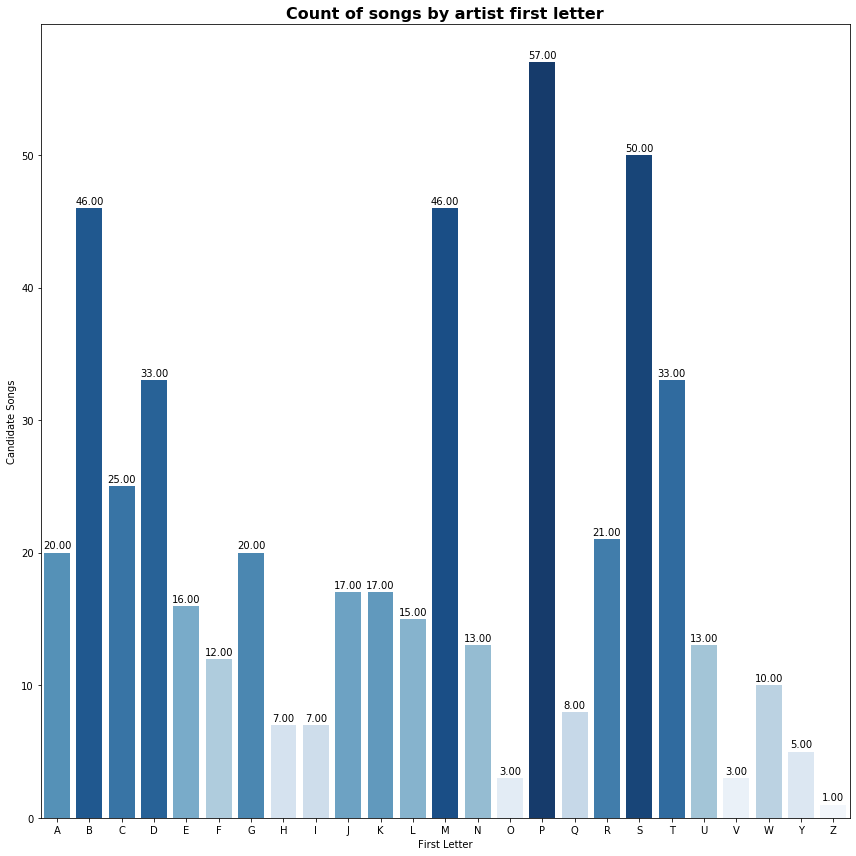

In [59]:
plt.figure(figsize=(12,12))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.sum_candidate_songs.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.sum_candidate_songs, palette = np.array(pal[::-1])[rank])
ax.set_title("Count of songs by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Candidate Songs')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:1.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

Once again, no distinct advantage for the first letters of the 'ABC' over here. Let's have a look at some popularity indicators from both Spotify and Wikipedia to see if any of those letters contain more popular artists.

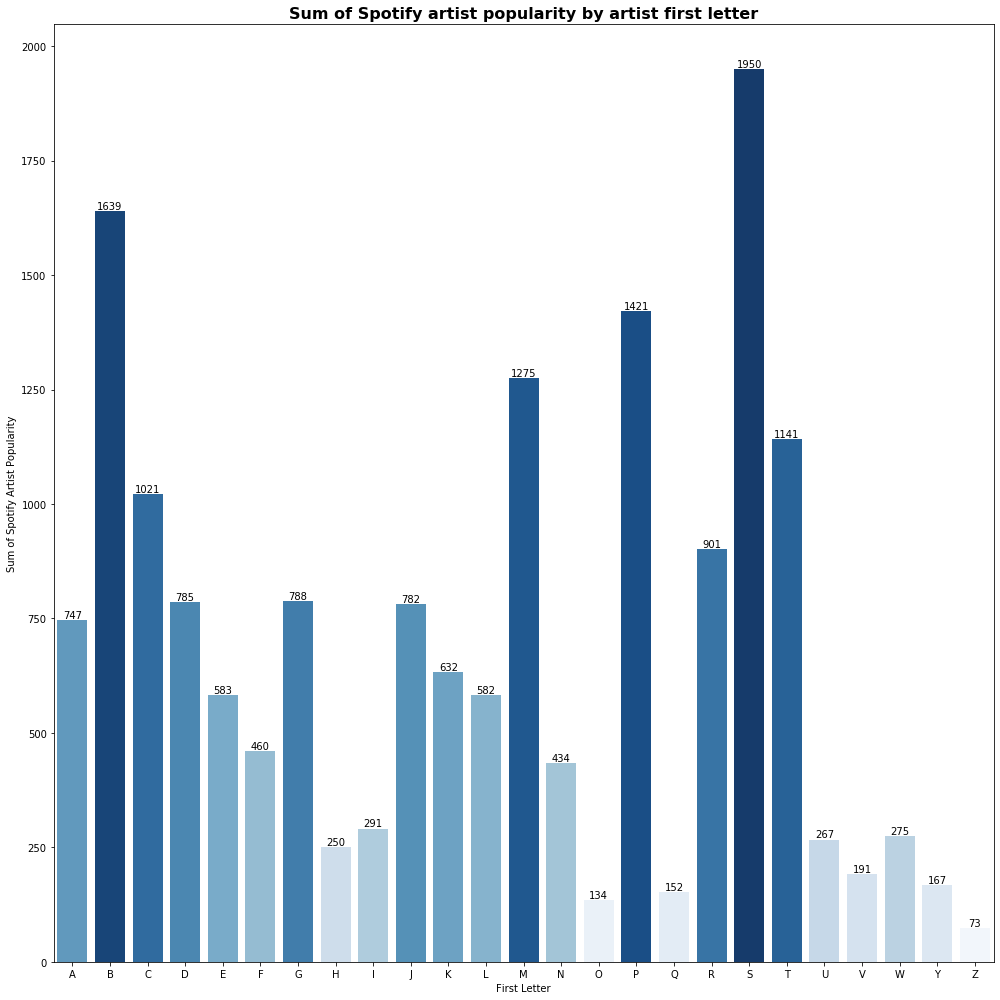

In [60]:
plt.figure(figsize=(14,14))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.sum_popularity.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.sum_popularity, palette = np.array(pal[::-1])[rank])
ax.set_title("Sum of Spotify artist popularity by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Sum of Spotify Artist Popularity')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 4.5,
            '{:.0f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

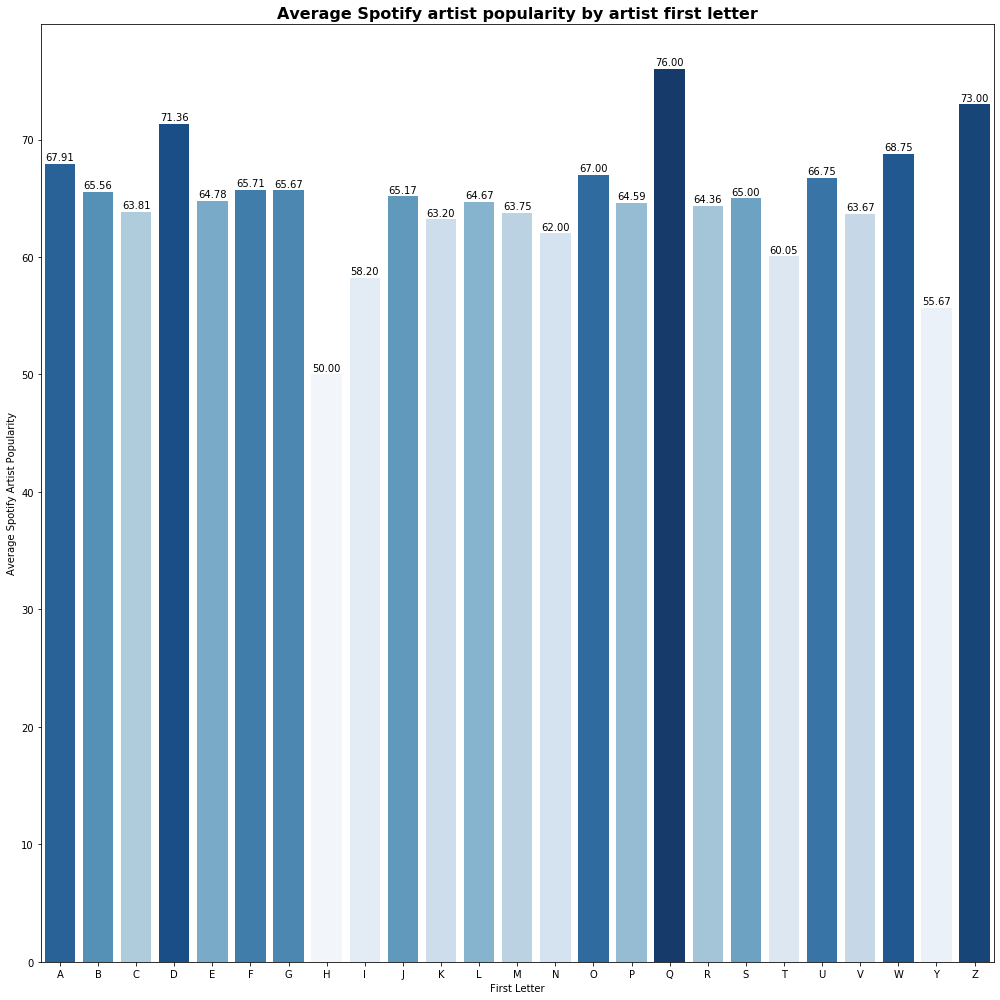

In [61]:
plt.figure(figsize=(14,14))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.avg_popularity.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.avg_popularity, palette = np.array(pal[::-1])[rank])
ax.set_title("Average Spotify artist popularity by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Average Spotify Artist Popularity')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

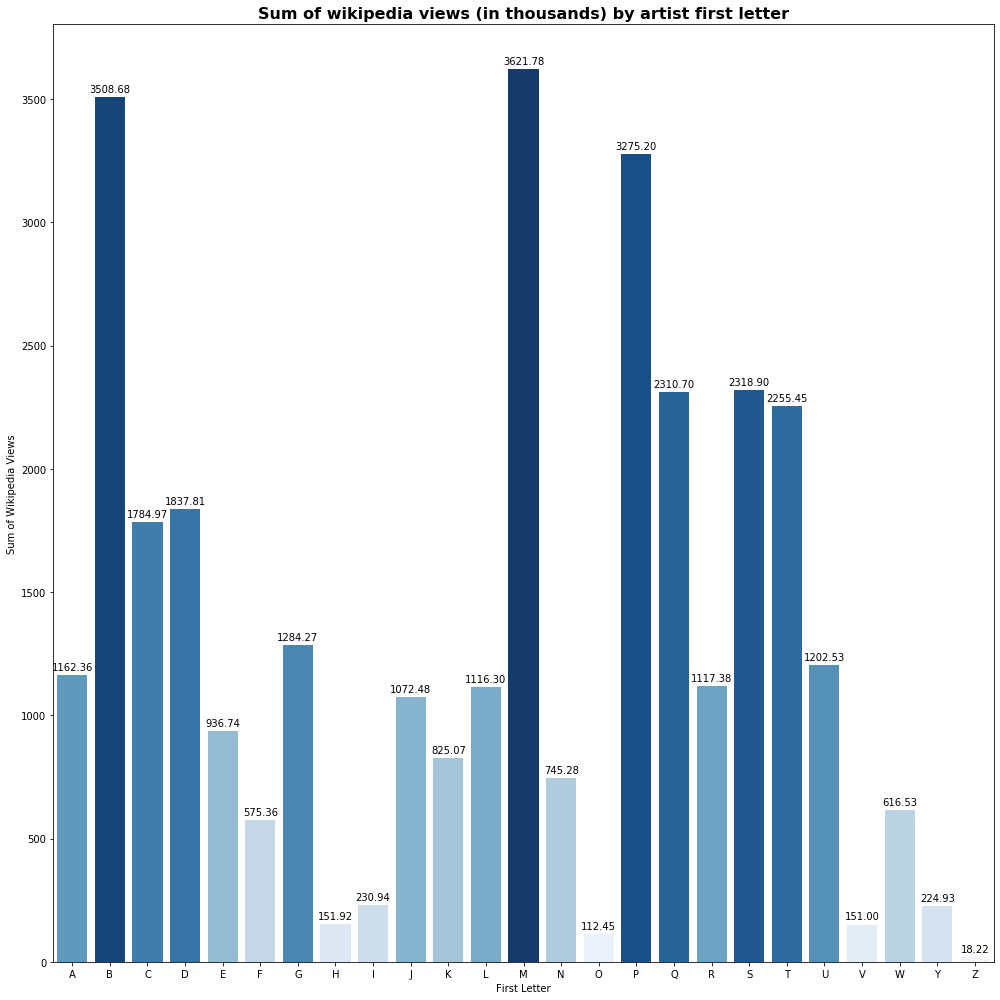

In [74]:
plt.figure(figsize=(14,14))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.sum_views.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.sum_views/1000, palette = np.array(pal[::-1])[rank])
ax.set_title("Sum of wikipedia views (in thousands) by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Sum of Wikipedia Views')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 20,
            '{:.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

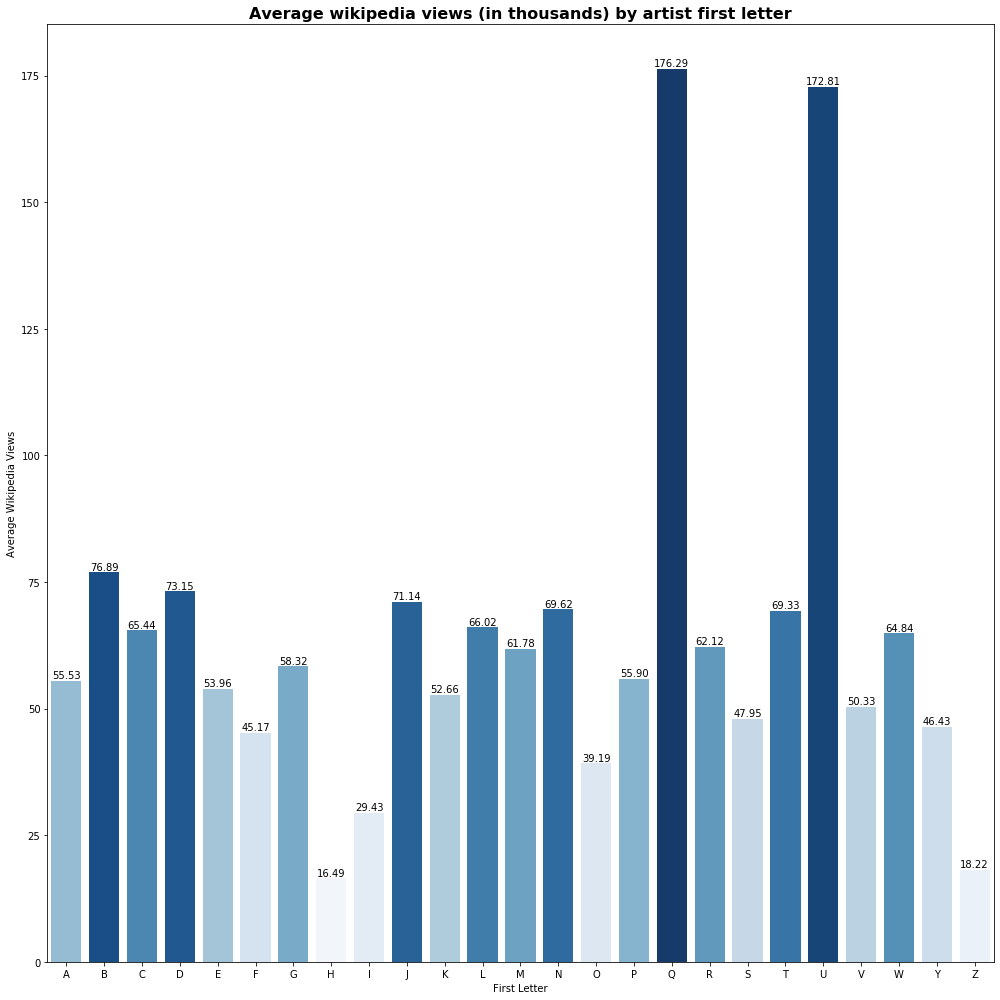

In [78]:
plt.figure(figsize=(14,14))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.avg_views.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.avg_views/1000, palette = np.array(pal[::-1])[rank])
ax.set_title("Average wikipedia views (in thousands) by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Average Wikipedia Views')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.5,
            '{:.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

Above we've had four graphs as indicators for popularity of artists and songs by artist's first letter. We were trying to look for any bias towards some letters that can be used as an explanation in case we find any bias in the chart's results. Those graphs were indecisive therefore we could say that no such clear bias was found. Now let's have a look at the count of songs entered the chart for each letter.

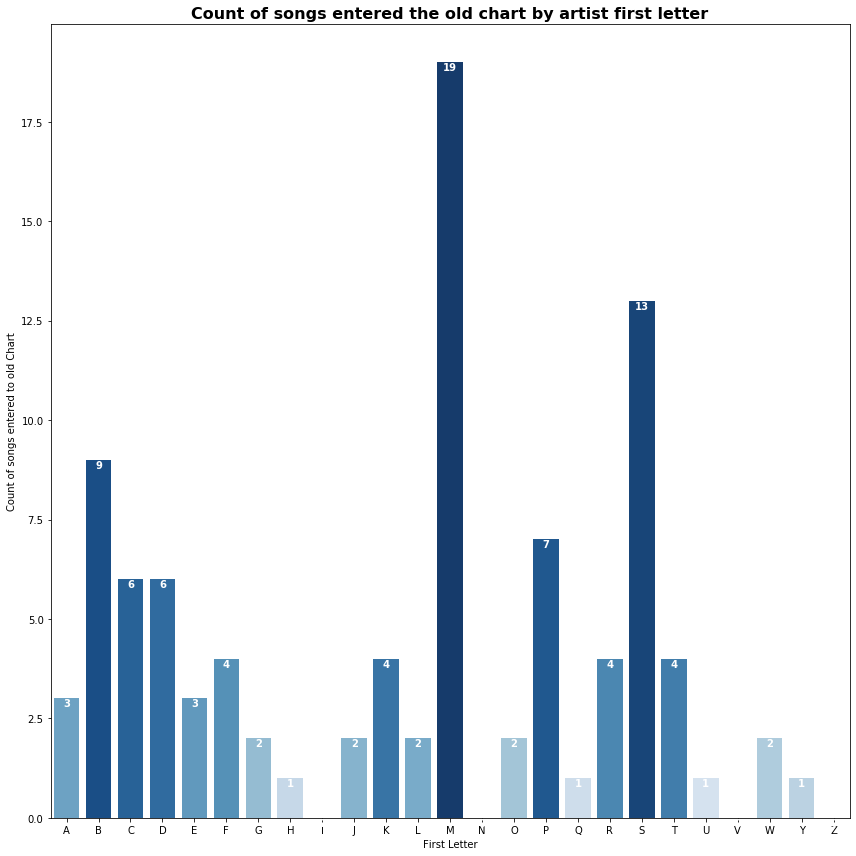

In [79]:
plt.figure(figsize=(12,12))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.count_old_chart.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.count_old_chart, palette = np.array(pal[::-1])[rank])
ax.set(xlabel="First Letter", ylabel='Count of songs entered to old Chart')
ax.set_title("Count of songs entered the old chart by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
#for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(fl_df.count_old_chart):
    ax.text(i ,v, "{:,}".format(v), va ='top', ha= "center", color="white", weight="bold")
plt.tight_layout()
plt.show()

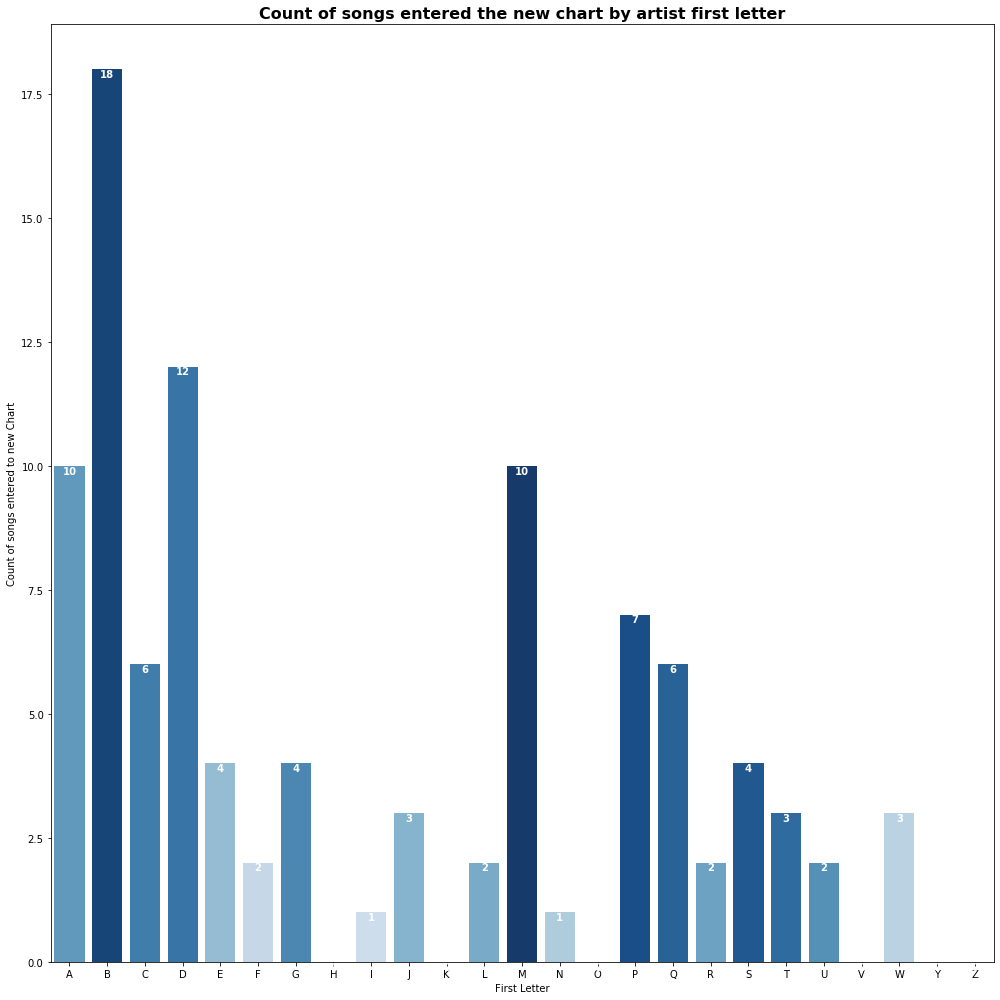

In [80]:
plt.figure(figsize=(14,14))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.sum_views.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.count_new_chart, palette = np.array(pal[::-1])[rank])
ax.set_title("Count of songs entered the new chart by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Count of songs entered to new Chart')
#for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(fl_df.count_new_chart):
    ax.text(i ,v, "{:,}".format(v), va ='top', ha= "center", color="white", weight="bold")
plt.tight_layout()
plt.show()

Looking at the second graph, which describes the recent chart, we can see that the first letters sticks out. The most common letter is 'B', while it didn't stand out in the original chart. This all can get quite confusing, so let's have a look on the entrance percentage. Our goal is to establish whether it's easier for songs to get into the chart if the belong to a certain letter.

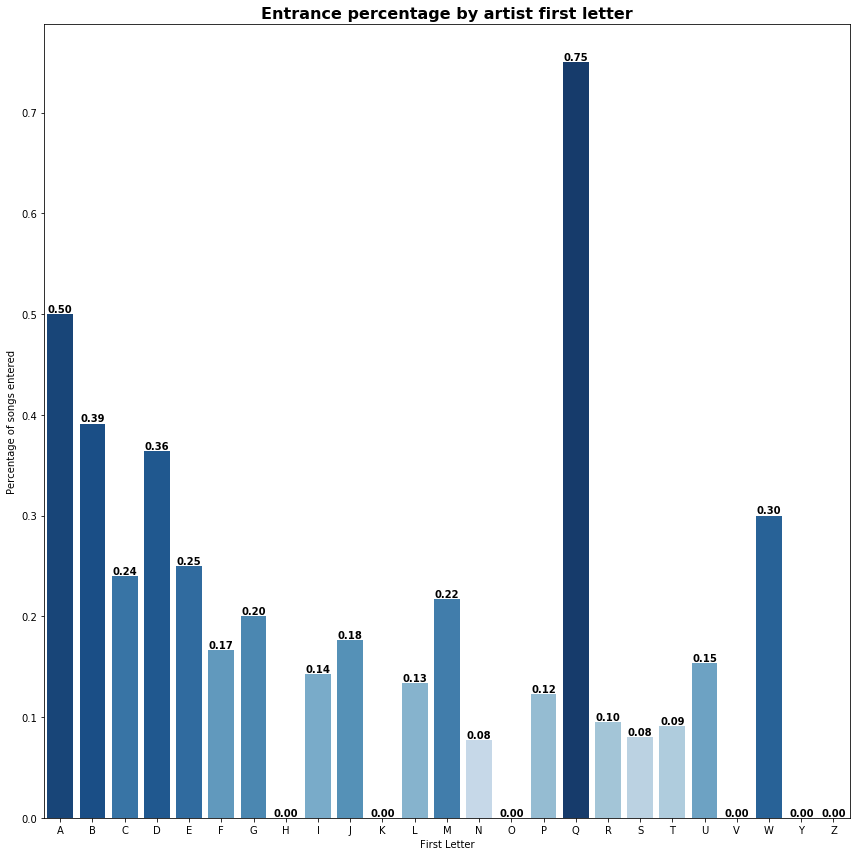

In [81]:
plt.figure(figsize=(12,12))
pal = sns.color_palette("Blues_r", len(fl_df.name))
rank = fl_df.entrance_percentage.argsort().argsort()
ax = sns.barplot(x=fl_df.name, y=fl_df.entrance_percentage, palette = np.array(pal[::-1])[rank])
ax.set_title("Entrance percentage by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="First Letter", ylabel='Percentage of songs entered')
#for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(fl_df.entrance_percentage):
    ax.text(i ,v, "{:,.2f}".format(v), va ='bottom', ha= "center", weight="bold")
plt.tight_layout()
plt.show()

Other the 'Q', which is populated mostly by Queen, which are a unique pheonmena, we can see that it actually is easier to get into the chart coming from 'A'. 

## Year

In [3]:
grouped_by_year = eighties_df.groupby('year')
year_df = []
for group in grouped_by_year:
    year = {}
    year['name'] = group[0]
    year['count_candidates'] = group[1]['name'].count()
    year['count_entrances'] = group[1].loc[group[1]['new_chart_location'] <= 100]['name'].count()
    year['entrance_percentage'] = year['count_entrances']/year['count_candidates']
    year['avg_song_pop'] = group[1]['song_popularity'].mean()
    year['avg_views'] = group[1]['views'].mean()
    year['avg_chart_location'] = group[1].loc[group[1]['new_chart_location'] > 0]['new_chart_location'].mean()
    year['avg_valence'] = group[1]['valence'].mean()
    genres = {}
    for song in group[1]['genres']:
        for song_genre in song.split(","):
            if len(re.findall(r"'([^']*)'", song_genre))>0:
                if re.findall(r"'([^']*)'", song_genre)[0] not in genres.keys():
                    genres[re.findall(r"'([^']*)'", song_genre)[0]] = 1
                else:
                    genres[re.findall(r"'([^']*)'", song_genre)[0]] += 1
    year['popular_genre'] = max(genres.items(), key=operator.itemgetter(1))[0]
    year_df.append(year)
year_df= pd.DataFrame(year_df)
display(year_df)

,name,count_candidates,count_entrances,entrance_percentage,avg_song_pop,avg_views,avg_chart_location,avg_valence,popular_genre
0,1980,53,17,0.320755,60.886792,66506.415094,229.264151,0.600615,Disco
1,1981,38,8,0.210526,62.000000,67204.447368,271.184211,0.684237,New wave music
2,1982,62,9,0.145161,58.645161,60332.822581,276.854839,0.689581,New wave music
3,1983,59,12,0.203390,61.220339,71974.033898,247.016949,0.720305,New wave music
4,1984,54,16,0.296296,62.222222,88332.666667,201.129630,0.605693,Synthpop
5,1985,63,9,0.142857,59.634921,59390.904762,273.587302,0.655079,Synthpop
6,1986,49,8,0.163265,59.693878,67480.183673,219.918367,0.680143,Synthpop
7,1987,47,8,0.170213,60.106383,54776.914894,249.808511,0.662213,Synthpop
8,1988,37,7,0.189189,57.513514,52491.945946,275.891892,0.547576,Pop music
9,1989,36,6,0.166667,62.444444,57131.083333,256.500000,0.572694,Pop rock


Let's have a look at the yearly breakdown. The most popular year is 1980 looking at both the number of candidates, and the number of songs entered the chart. The reason might be that a lot of songs that were released in the late seventies were counted as released in 1980. Once again, the popular genre breakdown provides a glimpse on the musical story of the century - which was heavily influenced by the widespread of synthesizers. It started at the prime of the Disco era, and ended with dominance of pop-rock ballads.

## Year Source

In [4]:
year_source = eighties_df.groupby('year_source')
source_df = []
for group in year_source:
    source = {}
    source['name'] = group[0]
    source['count_songs'] = group[1]['name'].count()
    source['avg_song_popularity'] = group[1]['song_popularity'].mean()
    source['avg_views'] = group[1]['views'].mean()
    source['count_old_chart'] = group[1]['old_chart_position'].loc[group[1]['old_chart_position'] > 0].count()
    source['count_new_chart'] = group[1]['new_chart_location'].loc[group[1]['new_chart_location'] <= 100].count()
    source['entrance_percentage'] = source['count_new_chart']/source['count_songs']
    source['avg_new_chart'] = group[1]['new_chart_location'].mean()
    source_df.append(source)
source_df = pd.DataFrame(source_df)
display(source_df)

,name,count_songs,avg_song_popularity,avg_views,count_old_chart,count_new_chart,entrance_percentage,avg_new_chart
0,manual,17,53.058824,43169.647059,2,2,0.117647,284.235294
1,spotify,48,59.500000,76969.937500,4,5,0.104167,258.958333
2,wikipedia,433,60.775982,64731.702079,90,93,0.214781,247.087760


I have tagged my songs the way that the software looks first in Wikipdia. If Wikipedia doesn't contain a tagging which fits the requirement (it must be within the century's boundaries), then I look for the tagging in Spotify. If no proper tagging exists, than I tagged the years manually. Once again, it seems like the songs that Wikipedia was able to find proper tagging to were more popular than the one's that didn't.

Now I have decided to compare the songs that entered to the chart to the ones who didn't.

In [5]:
eighties_df["entered_chart"] = eighties_df["new_chart_location"] < 101
entered_chart = eighties_df.groupby('entered_chart')
entered_df = []
for group in entered_chart:
    bol = {}
    bol['name'] = group[0]
    bol['avg_song_popularity'] = group[1]['song_popularity'].mean()
    bol['avg_artist_popularity'] = group[1]['artist_popularity'].mean()
    bol['avg_duration'] = group[1]['duration_ms'].mean()
    bol['avg_key'] = group[1]['key'].mean()
    bol['avg_time_signature'] = group[1]['time_signature'].mean()
    bol['avg_acousticness'] = group[1]['acousticness'].mean()
    bol['avg_danceability'] = group[1]['danceability'].mean()
    bol['avg_energy'] = group[1]['energy'].mean()
    bol['avg_instrumentalness'] = group[1]['instrumentalness'].mean()
    bol['avg_loudness'] = group[1]['loudness'].mean()
    bol['avg_speechiness'] = group[1]['speechiness'].mean()
    bol['avg_valence'] = group[1]['valence'].mean()
    bol['avg_tempo'] = group[1]['tempo'].mean()
    bol['avg_views'] = group[1]['views'].mean()
    bol['avg_year'] = group[1]['year'].mean()
    bol['count_old_position'] = group[1]['old_chart_position'].loc[group[1]['old_chart_position'] > 0].count()
    entered_df.append(bol)
entered_df = pd.DataFrame(entered_df)
display(entered_df)

,name,avg_song_popularity,avg_artist_popularity,avg_duration,avg_key,avg_time_signature,avg_acousticness,avg_danceability,avg_energy,avg_instrumentalness,avg_loudness,avg_speechiness,avg_valence,avg_tempo,avg_views,avg_year,count_old_position
0,False,58.085427,67.655779,261980.145729,5.278894,3.982412,0.207527,0.648917,0.654274,0.066419,-9.691819,0.045726,0.661795,121.204291,50517.771357,1984.341709,68
1,True,69.560000,76.050000,268698.110000,4.390000,3.970000,0.239258,0.595270,0.640030,0.045753,-8.986930,0.044799,0.589969,116.881550,123511.950000,1983.850000,28


Some interesting conclusions are coming out of this table. It is not much of a surprise to see that the songs who entered the chart are on average more popular on both Spotify and Wikipedia. The surprising thing is to see that the songs who made it into the chart are of more acoustic and less danceable characteristic. Only 28 of them have entered to the original yearly charts.

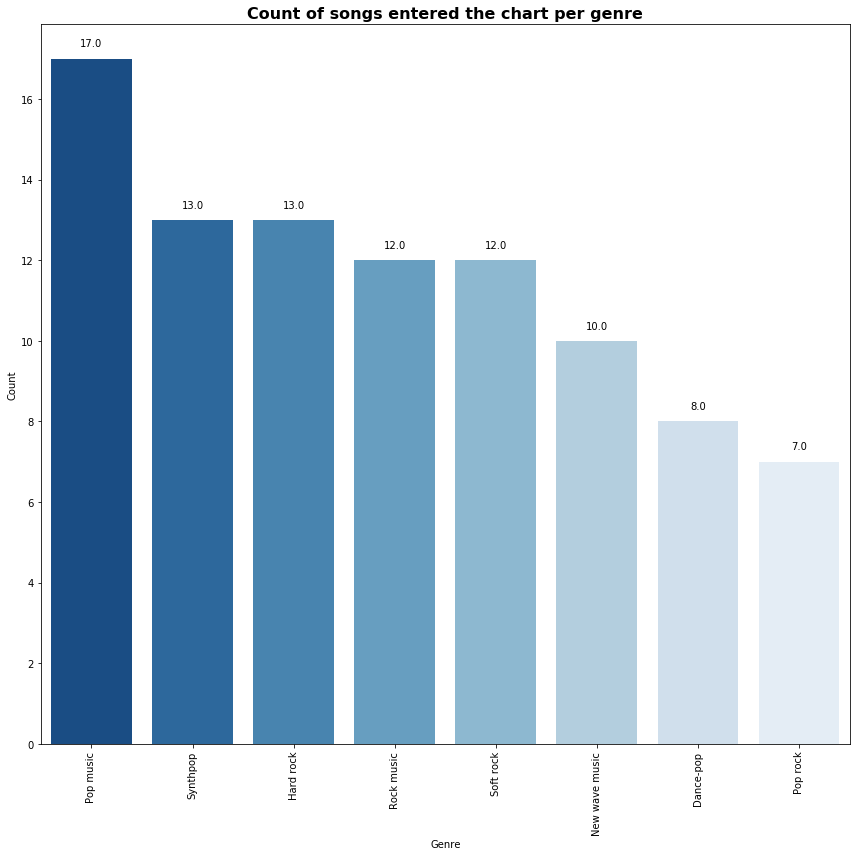

In [6]:
entered_songs = eighties_df.loc[eighties_df['entered_chart'] == True]
genres_dict = {}
for song_genre in entered_songs['genres']:
    for genre in song_genre.split(","):
        if len(re.findall(r"'([^']*)'", genre))>0:
            if re.findall(r"'([^']*)'", genre)[0] in genres_dict.keys():
                genres_dict[re.findall(r"'([^']*)'", genre)[0]] = genres_dict[re.findall(r"'([^']*)'", genre)[0]] + 1
            else:
                genres_dict[re.findall(r"'([^']*)'", genre)[0]] = 1
newDict = dict(filter(lambda elem: elem[1] > 5,genres_dict.items()))
order_key = sorted(newDict.items(), key=operator.itemgetter(1), reverse = True)
keys = []
for key in order_key:
    keys.append(key[0])
plt.figure(figsize=(12,12))
ax = sns.barplot(x=list(newDict.keys()), y=np.array(list(newDict.values())).astype(float), order = keys,
                palette = "Blues_r")
ax.set_title("Count of songs entered the chart per genre", {'fontsize': 16,'fontweight' : 'bold'})
ax.set(xlabel="Genre", ylabel='Count')
for item in ax.get_xticklabels(): item.set_rotation(90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:,}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

The genres of the songs that inserted does not seem too diverse - they range on the pop-rock scale, with first electronical influences seen at 'Synthpop' and 'Dance-pop' songs. While i'm discussing only the top 100 songs, I didn't forget my main question - how did the first letter of the artists had influenced the results?
Now, I have aggregated 'A' and 'B' in one group, and the rest in another to look for influence.

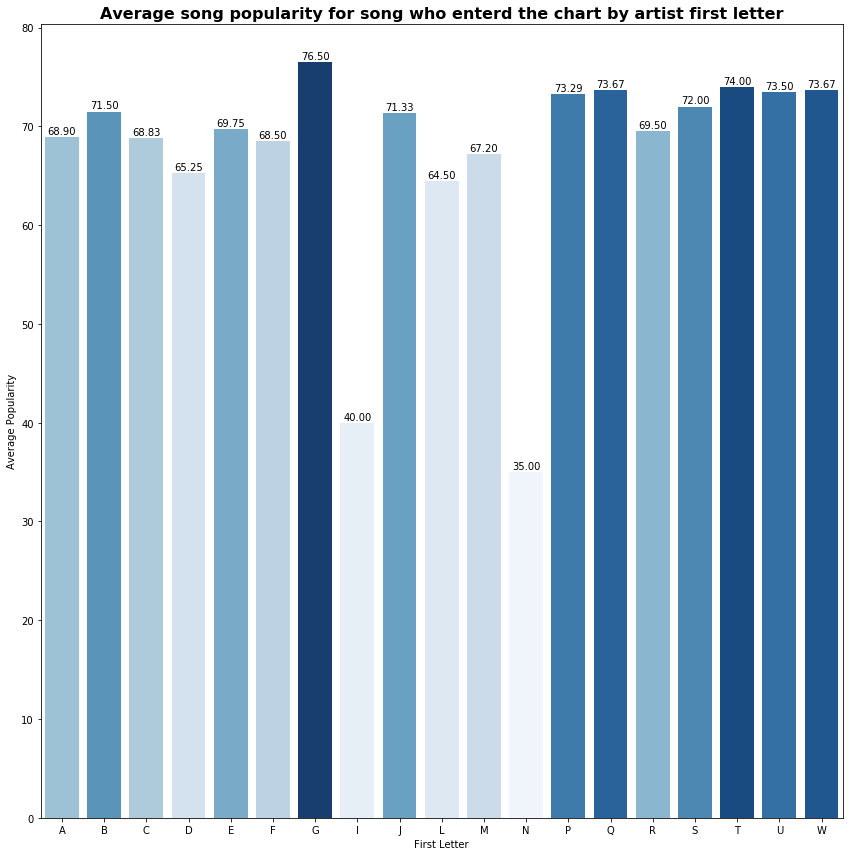

In [7]:
entered_first_letter = entered_songs.groupby('artist_first_letter')
entered_fl_df = []
for group in entered_first_letter:
    entered_fl = {}
    entered_fl['name'] = group[0]
    entered_fl['avg_song_popularity'] = group[1]['song_popularity'].mean()
    entered_fl['avg_chart_location'] = group[1]['new_chart_location'].mean()
    entered_fl_df.append(entered_fl)
entered_fl_df = pd.DataFrame(entered_fl_df)
plt.figure(figsize=(12,12))
pal = sns.color_palette("Blues_r", len(entered_fl_df.name))
rank = entered_fl_df.avg_song_popularity.argsort().argsort()
ax = sns.barplot(x=entered_fl_df.name, y=entered_fl_df.avg_song_popularity, palette = np.array(pal[::-1])[rank])
ax.set(xlabel="First Letter", ylabel='Average Popularity')
ax.set_title("Average song popularity for song who enterd the chart by artist first letter", {'fontsize': 16,'fontweight' : 'bold'})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:,.2f}'.format(p.get_height()),
            ha="center")
plt.tight_layout()
plt.show()

In [8]:
count_first_songs = 0
popularity_first_rate = 0
location_first_rate = 0
count_last_songs = 0
popularity_last_rate = 0
location_last_rate = 0
for fl in entered_first_letter:
    if fl[0] in ['1', 'A', 'B']:
        count_first_songs = count_first_songs + fl[1]['name'].count()
        popularity_first_rate = popularity_first_rate + fl[1]['song_popularity'].sum()
        location_first_rate = location_first_rate + fl[1]['new_chart_location'].sum()
    else:
        count_last_songs = count_last_songs + fl[1]['name'].count()
        popularity_last_rate = popularity_last_rate + fl[1]['song_popularity'].sum()
        location_last_rate = location_last_rate + fl[1]['new_chart_location'].sum()
comparing_letters = pd.DataFrame({'Name': ['First Letters', 'Rest of the Letters'], 'Count': [count_first_songs, count_last_songs], 'Popularity': [popularity_first_rate, popularity_last_rate],
                                 'Avg_Popularity': [popularity_first_rate/count_first_songs, popularity_last_rate/count_last_songs],
                                 'Avg_Location': [location_first_rate/count_first_songs, location_last_rate/count_last_songs]})
display(comparing_letters)

,Name,Count,Popularity,Avg_Popularity,Avg_Location
0,First Letters,28,1976,70.571429,41.000000
1,Rest of the Letters,72,4980,69.166667,54.194444


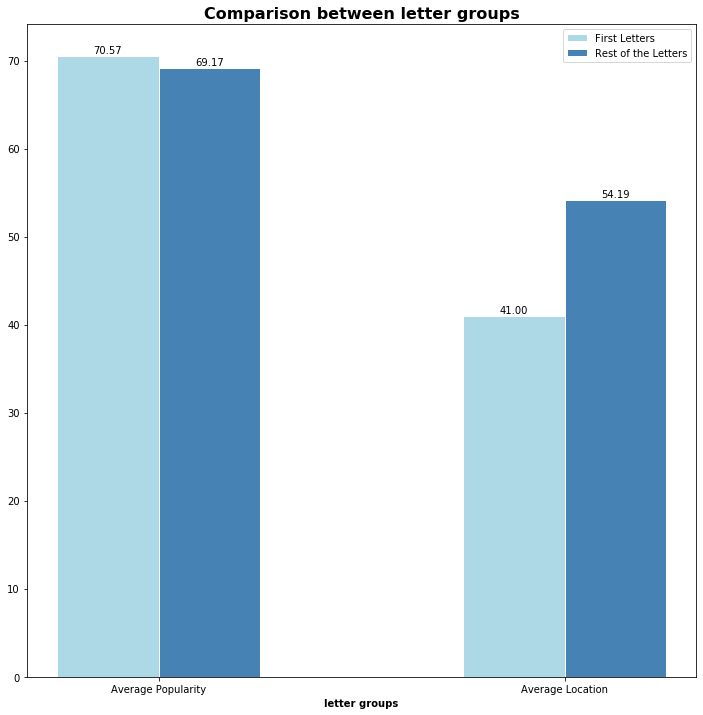

In [9]:
df_for_graph = pd.DataFrame({
    'First Letters': [popularity_first_rate/count_first_songs, location_first_rate/count_first_songs],
    'Rest': [popularity_last_rate/count_last_songs, location_last_rate/count_last_songs]
})

barWidth = 0.25
 
# set height of bar
bars1 = df_for_graph['First Letters']
bars2 = df_for_graph['Rest']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title("Comparison between letter groups", {'fontsize': 16,'fontweight' : 'bold'})

# Make the plot
plt.bar(r1, bars1, color='lightblue', width=barWidth, edgecolor='white', label='First Letters')
plt.bar(r2, bars2, color='steelblue', width=barWidth, edgecolor='white', label='Rest of the Letters')

# Add xticks on the middle of the group bars
plt.xlabel('letter groups', fontweight='bold')
plt.xticks([r + (barWidth / 2) for r in range(len(bars1))], ['Average Popularity', 'Average Location'])

for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height + 0.3,
            '{:,.2f}'.format(p.get_height()),
            ha="center")

# Create legend & Show graphic
plt.legend()
plt.show()


This graph is the most indicative one as to whether such influence exists. It shows the average spotify popularity rate of those who made it into the chart. If the average rate of the first letters is smaller than the rest, it means that it's easier for songs to get into the chart. Here, we see that it doesn't happen. In the right side we see the average location of these songs. The lower it goes that means the group got more votes. Here we see a big difference between the first couple of letters and the rest of the songs. I will sum up that the results here are not as obvious as they were at the seventies chart.

## T test
This is a statistical test meant to measure the statistical significance between these groups. I will test the significance of the difference in both parameters and look at the p-value. If it is smaller than 0.05 than the difference is significant.

In [10]:
first_letters_popularity = []
rest_letters_popularity = []
first_letters_location = []
rest_letters_location = []
for fl in entered_first_letter:
    if fl[0] in ['1', 'A', 'B']:
        for song_popularity in fl[1]['song_popularity']:
            first_letters_popularity.append(song_popularity)
        for song_location in fl[1]['new_chart_location']:    
            first_letters_location.append(song_location)
    else:
        for song_popularity in fl[1]['song_popularity']:
            rest_letters_popularity.append(song_popularity)
        for song_location in fl[1]['new_chart_location']:    
            rest_letters_location.append(song_location)
        
print(st.ttest_ind(first_letters_popularity, rest_letters_popularity, equal_var = False))
print(st.ttest_ind(first_letters_location, rest_letters_location, equal_var = False))

Ttest_indResult(statistic=0.8363204139546107, pvalue=0.40616410231444533)
Ttest_indResult(statistic=-2.0580599003038342, pvalue=0.04499033892518406)


Only the location difference shows statistical significance.